This notebook create Mel spectrograms from the song American Idiot by Green day split into 15 segments. These heatmaps are example visual representations of the data used to train/test and validate the keras CNN model. The code also includes a playback button below each spectrogram so the audio segment corresponding to the plot can be listened to as well as viewed. The audio file is downloaded from Youtube and should be processed and run as is, if the modules and dependencies listed below are installed. The audio segments are placed in a folder and the user can automatically delete the folder or keep it with a simple yes/no input. playback and file deletion can be performed entirely in a Jupyter notebook.  

Complete List of Required Modules:

librosa:
For loading audio files, calculating Mel spectrograms, and other audio-related tasks.
Installation: pip install librosa

matplotlib:
Used for plotting the Mel spectrograms.
Installation: pip install matplotlib

seaborn:
A data visualization library used for setting plot styles.
Installation: pip install seaborn

numpy:
A core library for numerical computations, used to handle audio data arrays.
Installation: pip install numpy

pydub:
For audio manipulation like splitting and exporting audio segments as MP3 files.
Installation: pip install pydub
Note: pydub requires ffmpeg to handle MP3 files.

shutil:
A built-in Python module for high-level file operations (e.g., deleting folders).
No installation required since it's part of Python's standard library.

IPython:
The IPython.display module is used to play audio files within Jupyter notebooks or other IPython environments.
Installation: pip install ipython

yt-dlp:
For downloading videos or audio from YouTube. It is a replacement for youtube-dl.
Installation: pip install yt-dlp

Note: Like pydub, this requires ffmpeg to handle MP3 files.

subprocess:
A built-in Python module that allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes. In this code, it is used to run the yt-dlp command to download audio from YouTube.
No installation required since it's part of Python's standard library.

os:
A built-in Python module for interacting with the operating system. It's used here to check if a folder exists, remove it, and create a new one.
No installation required since it's part of Python's standard library

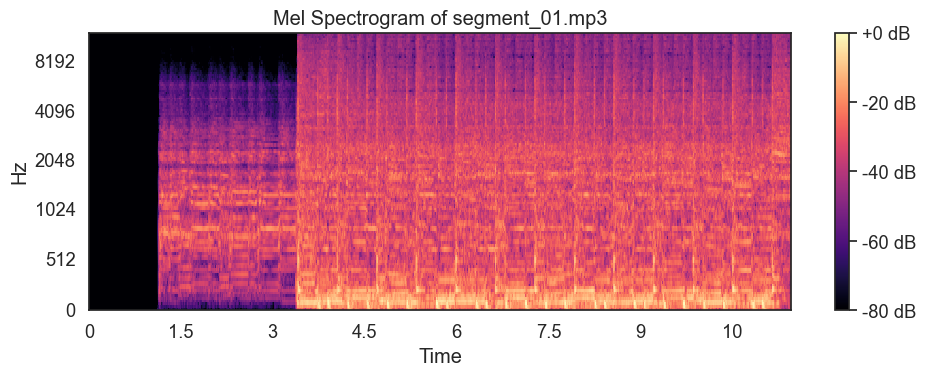

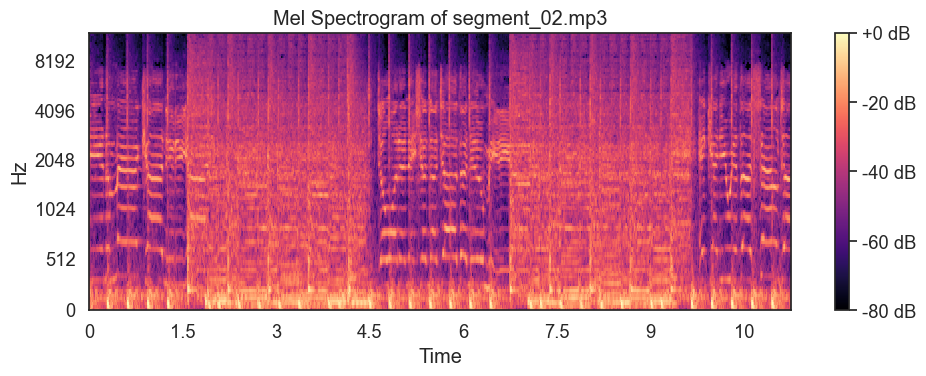

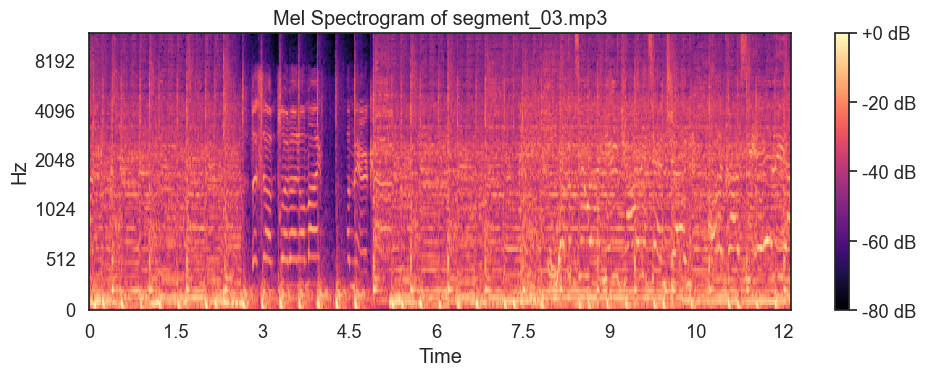

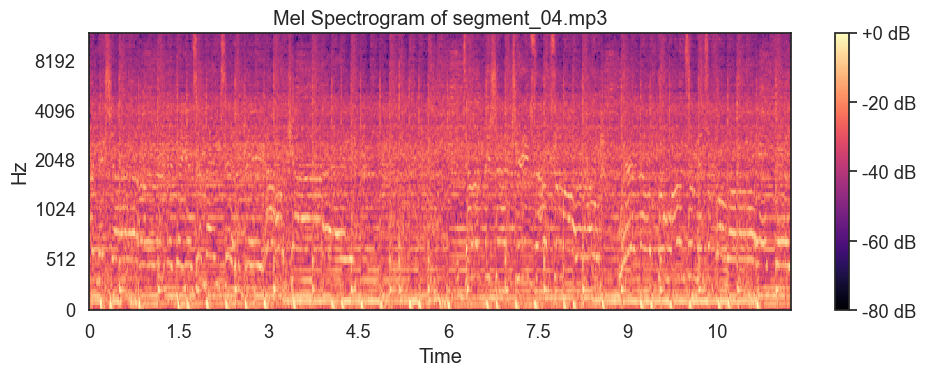

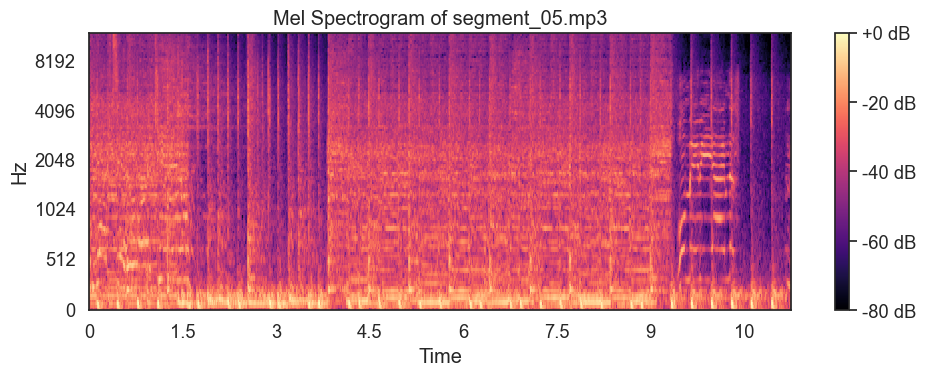

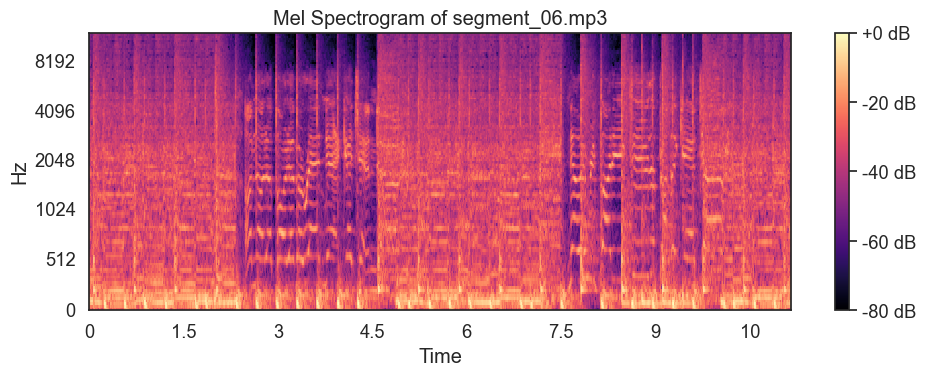

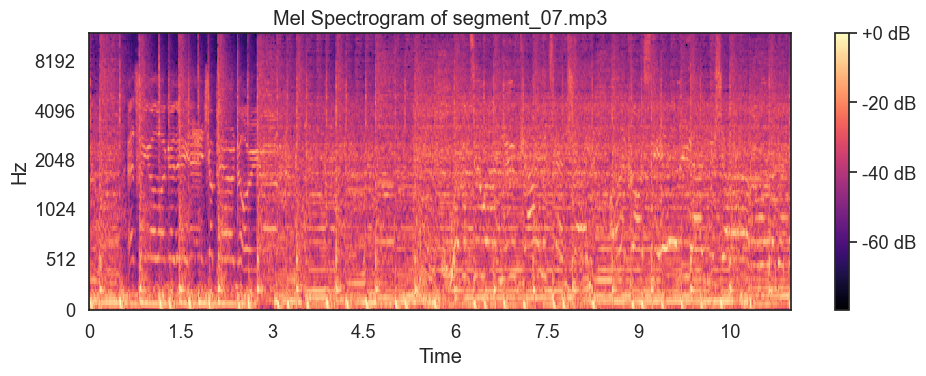

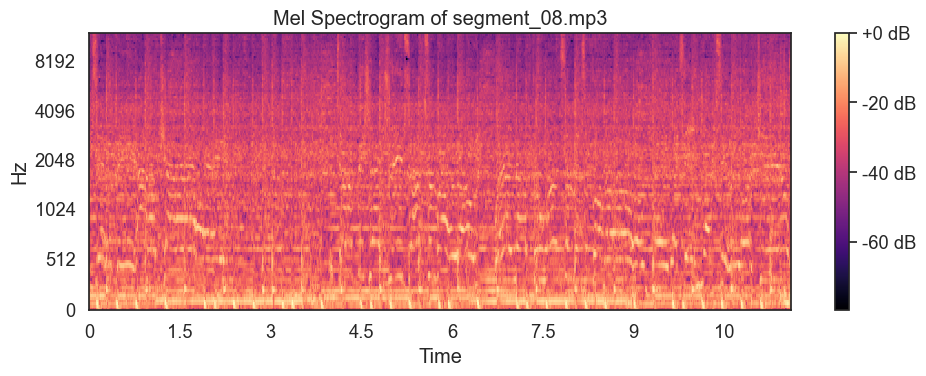

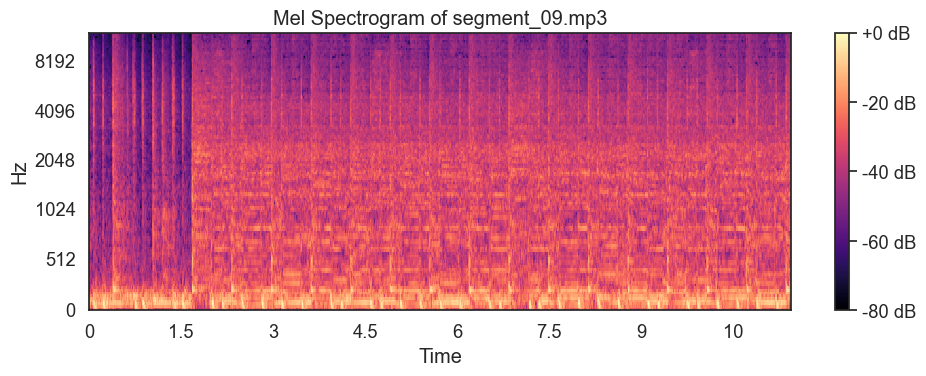

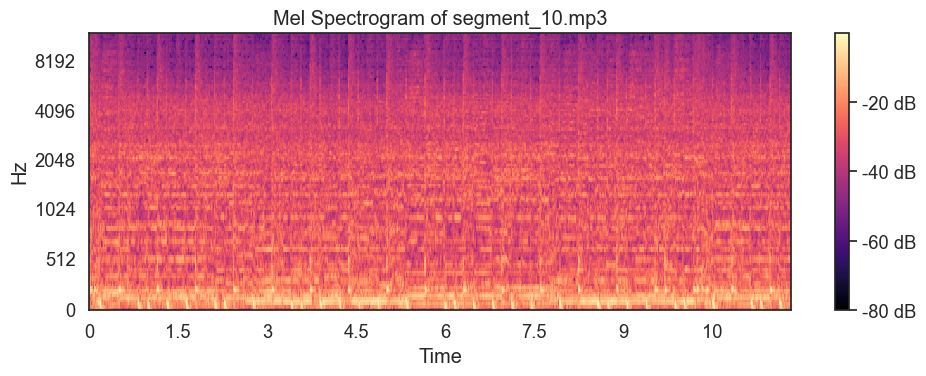

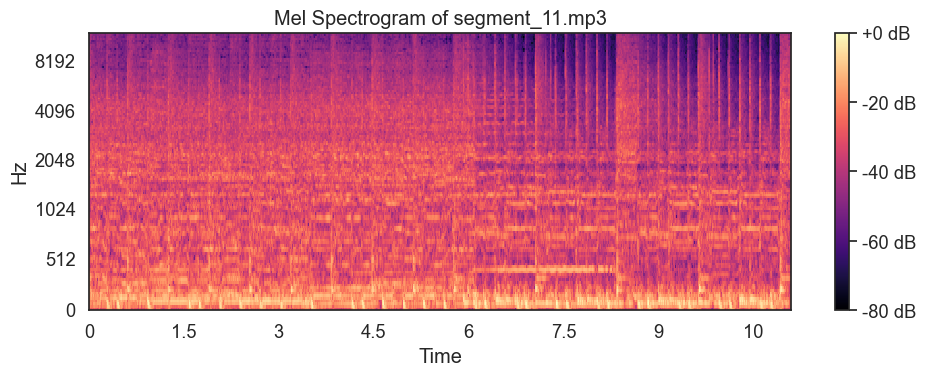

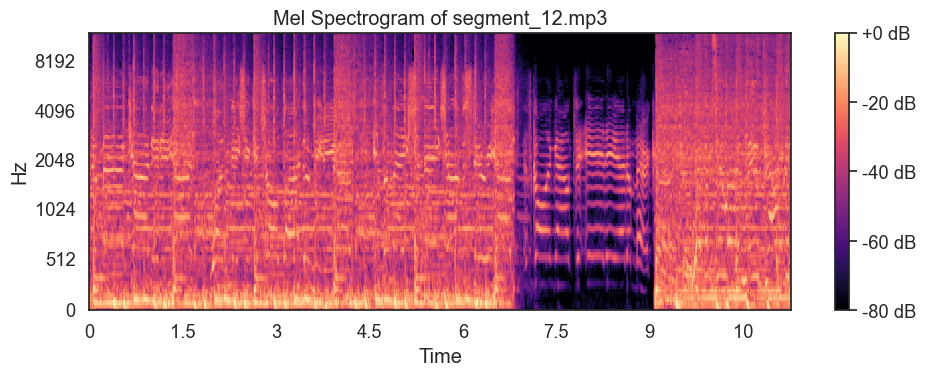

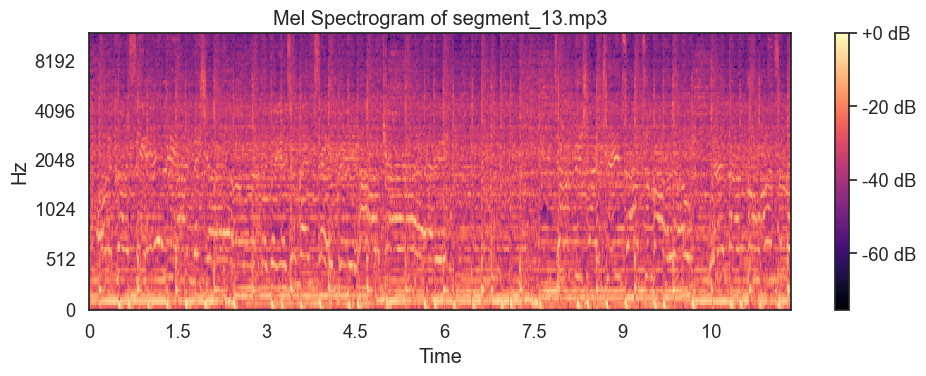

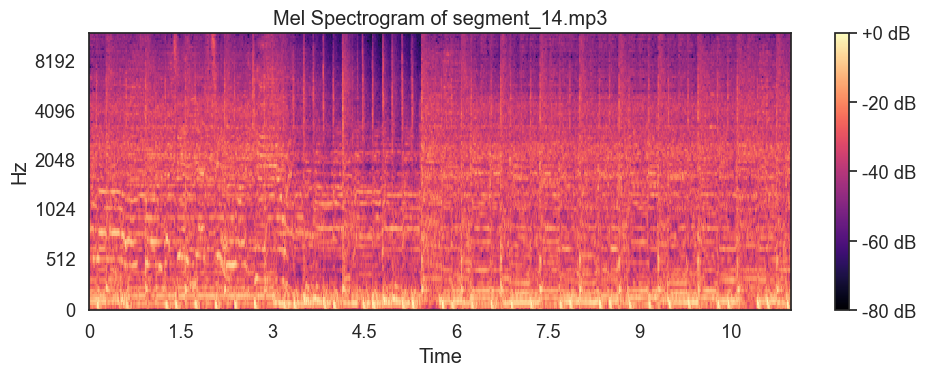

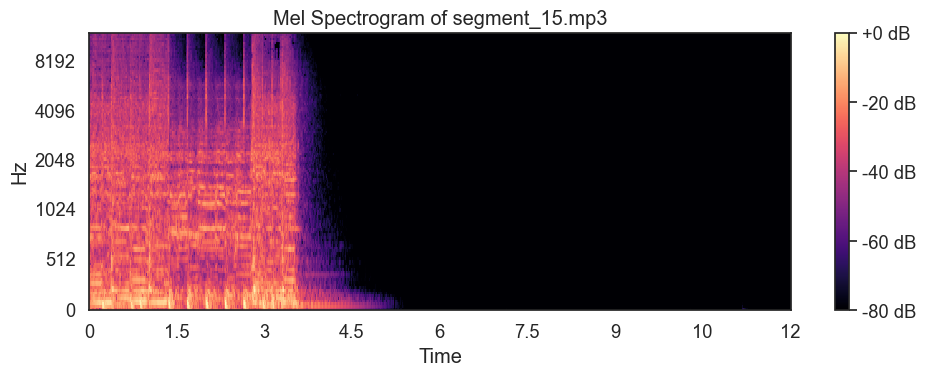

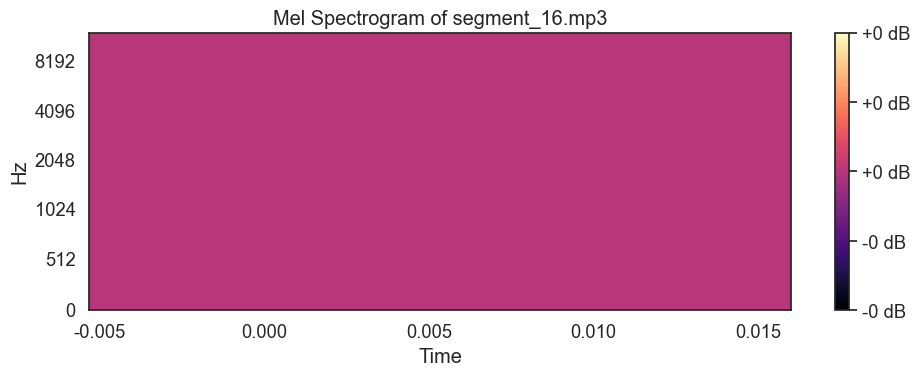

In [ ]:

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from pydub import AudioSegment
from pydub.utils import make_chunks
from IPython.display import Audio, display

# Set seaborn style
sns.set(style='white', palette='muted', font_scale=1.2)

# YouTube video URL and download path using yt-dlp
import subprocess

# YouTube video URL
url = 'https://www.youtube.com/watch?v=Ee_uujKuJMI'
audio_file = 'american_idiot.mp3'

# Download the audio and save it as 'american_idiot.mp3'
subprocess.run(['yt-dlp', '-x', '--audio-format', 'mp3', '-o', audio_file, url])

# Load the audio using pydub
audio = AudioSegment.from_mp3(audio_file)

# Number of segments to split the audio into
num_segments = 15

# Calculate the duration of each segment in milliseconds
segment_duration_ms = len(audio) // num_segments

# Create a folder to store the audio segments
segment_folder = 'audio_segments'
if os.path.exists(segment_folder):
    shutil.rmtree(segment_folder)  # Remove existing folder if needed
os.makedirs(segment_folder)

# Split the audio into 15 segments using pydub and save them as mp3
for i, chunk in enumerate(make_chunks(audio, segment_duration_ms)):
    # Use zero-padding for proper ordering in the file names
    segment_file = os.path.join(segment_folder, f'segment_{i + 1:02d}.mp3')
    chunk.export(segment_file, format="mp3")

# Function to display Mel spectrograms and playback buttons for each segment
def display_spectrograms_with_playback(folder_path):
    files = sorted(os.listdir(folder_path))  # Sort files to display in order
    
    for file in files:
        file_path = os.path.join(folder_path, file)
        
        # Load the segment audio file with librosa (pydub exports as mp3, so we re-load with librosa)
        y_segment, sr_segment = librosa.load(file_path, sr=None)
        
        # Create Mel spectrogram
        S = librosa.feature.melspectrogram(y=y_segment, sr=sr_segment, n_mels=128, n_fft=2048, hop_length=512, fmax=12000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        
        # Plot the Mel spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(S_dB, sr=sr_segment, x_axis='time', y_axis='mel', fmax=12000)
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Mel Spectrogram of {file}')
        plt.tight_layout()
        plt.show()
        
        # Playback button for each segment
        display(Audio(file_path))

# Display the Mel spectrograms and playback for each segment
display_spectrograms_with_playback(segment_folder)

# Ask the user if they want to delete the segments after playing them
delete_file = input("Would you like to delete the audio segments to avoid clutter? (yes/no): ").strip().lower()

# If the user says 'yes', delete the folder containing segments
if delete_file == 'yes':
    shutil.rmtree(segment_folder)
    print(f"The folder '{segment_folder}' and its contents have been deleted.")
else:
    print(f"The folder '{segment_folder}' has been kept.")
